# Lecture 12

# Comparisons, Masks, and Boolean Logic

This section covers the use of Boolean masks to examine and manipulate values within NumPy arrays.
Masking comes up when you want to extract, modify, count, or otherwise manipulate values in an array based on some criterion: for example, you might wish to count all values greater than a certain value, or perhaps remove all outliers that are above some threshold.
In NumPy, Boolean masking is often the most efficient way to accomplish these types of tasks.

### Digging into the data

One approach to this would be to answer these questions by hand: loop through the data, incrementing a counter each time we see values in some desired range.
For reasons discussed earlier, such an approach is very inefficient, both from the standpoint of time writing code and time computing the result.
NumPy's ufuncs can be used in place of loops to do fast element-wise arithmetic operations on arrays; in the same way, we can use other ufuncs to do element-wise *comparisons* over arrays, and we can then manipulate the results to answer the questions we have.
We'll leave the data aside for right now, and discuss some general tools in NumPy to use *masking* to quickly answer these types of questions.

## Comparison Operators as ufuncs

Earlier we examined ufuncs, and focused in particular on arithmetic operators. We saw that using ``+``, ``-``, ``*``, ``/``, and others on arrays leads to element-wise operations.
NumPy also implements comparison operators such as ``<`` (less than) and ``>`` (greater than) as element-wise ufuncs.
The result of these comparison operators is always an array with a Boolean data type.
All six of the standard comparison operations are available:

In [54]:
x = np.array([1, 2, 3, 4, 5])

In [55]:
# less than
x < 3

array([ True,  True, False, False, False])

In [56]:
# greater than
x > 3

array([False, False, False,  True,  True])

In [57]:
# less than or equal
x <= 3

array([ True,  True,  True, False, False])

In [58]:
# greater than or equal
x >= 3

array([False, False,  True,  True,  True])

In [59]:
# not equal
x != 3

array([ True,  True, False,  True,  True])

In [60]:
# equal
x == 3

array([False, False,  True, False, False])

It is also possible to do an element-wise comparison of two arrays, and to include compound expressions:

In [62]:
x

array([1, 2, 3, 4, 5])

In [61]:
(2 * x) == (x ** 2)

array([False,  True, False, False, False])

As in the case of arithmetic operators, the comparison operators are implemented as ufuncs in NumPy; for example, when you write ``x < 3``, internally NumPy uses ``np.less(x, 3)``.
    A summary of the comparison operators and their equivalent ufunc is shown here:

| Operator	    | Equivalent ufunc    || Operator	   | Equivalent ufunc    |
|---------------|---------------------||---------------|---------------------|
|``==``         |``np.equal``         ||``!=``         |``np.not_equal``     |
|``<``          |``np.less``          ||``<=``         |``np.less_equal``    |
|``>``          |``np.greater``       ||``>=``         |``np.greater_equal`` |

Just as in the case of arithmetic ufuncs, these will work on arrays of any size and shape.
Here is a two-dimensional example:

In [63]:
rng = np.random.RandomState(0)
x = rng.randint(10, size=(3, 4))
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [64]:
x < 6

array([[ True,  True,  True,  True],
       [False, False,  True,  True],
       [ True,  True, False, False]])

In each case, the result is a Boolean array, and NumPy provides a number of straightforward patterns for working with these Boolean results.

## Working with Boolean Arrays

Given a Boolean array, there are a host of useful operations you can do.
We'll work with ``x``, the two-dimensional array we created earlier.

In [65]:
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

### Counting entries

To count the number of ``True`` entries in a Boolean array, ``np.count_nonzero`` is useful:

In [66]:
# how many values less than 6?
np.count_nonzero(x < 6)

8

We see that there are eight array entries that are less than 6.
Another way to get at this information is to use ``np.sum``; in this case, ``False`` is interpreted as ``0``, and ``True`` is interpreted as ``1``:

In [68]:
x < 6

array([[ True,  True,  True,  True],
       [False, False,  True,  True],
       [ True,  True, False, False]])

In [67]:
np.sum(x < 6)

8

The benefit of ``sum()`` is that like with other NumPy aggregation functions, this summation can be done along rows or columns as well:

In [69]:
# how many values less than 6 in each row?
np.sum(x < 6, axis=1)

array([4, 2, 2])

This counts the number of values less than 6 in each row of the matrix.

If we're interested in quickly checking whether any or all the values are true, we can use (you guessed it) ``np.any`` or ``np.all``:

In [71]:
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [70]:
# are there any values greater than 8?
np.any(x > 8)

True

In [72]:
# are there any values less than zero?
np.any(x < 0)

False

In [73]:
# are all values less than 10?
np.all(x < 10)

True

In [74]:
# are all values equal to 6?
np.all(x == 6)

False

``np.all`` and ``np.any`` can be used along particular axes as well. For example:

In [75]:
# are all values in each row less than 8?
np.all(x < 8, axis = 1)

array([ True, False,  True])

Here all the elements in the first and third rows are less than 8, while this is not the case for the second row.

Finally, a quick warning: Python has built-in ``sum()``, ``any()``, and ``all()`` functions. These have a different syntax than the NumPy versions, and in particular will fail or produce unintended results when used on multidimensional arrays. Be sure that you are using ``np.sum()``, ``np.any()``, and ``np.all()`` for these examples!

### Example: Counting Rainy Days
Imagine you have a series of data that reflects the amount of rainfall daily during the year in a particular city

Dataset is from https://www.kaggle.com/datasets/malihachaity/heuristic-model

In [14]:
import pandas as pd


In [15]:
weather = pd.read_csv('seattle_weather_1948-2017.csv')
weather.head()

,DATE,PRCP,TMAX,TMIN,RAIN
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True


In [18]:
df_1948 = weather.head(366)
df_1948

,DATE,PRCP,TMAX,TMIN,RAIN
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True
...,...,...,...,...,...
361,1948-12-27,0.00,34,21,False
362,1948-12-28,0.33,45,31,True
363,1948-12-29,0.29,43,34,True
364,1948-12-30,0.46,44,35,True


In [23]:
rainfall = df_1948['PRCP'].values

In [24]:
mm = rainfall * 25.4
mm.shape

(366,)

In [25]:
mm

array([11.938, 14.986, 10.668,  7.874,  4.318, 11.176, 10.414,  1.016,
        3.048, 18.796,  0.254,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  5.334,  0.   ,  2.54 ,
        0.   ,  0.   ,  0.   ,  0.   ,  5.588,  0.762,  5.334,  0.762,
        0.   ,  5.08 ,  3.556,  0.   ,  0.   ,  1.524, 14.224,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   , 12.7  ,  8.89 , 21.336,  3.302,
        0.254,  0.   , 18.796, 11.684,  2.794,  0.   ,  1.27 , 24.892,
        2.286,  0.   ,  0.   ,  0.   ,  4.826,  0.   ,  0.   ,  0.   ,
        0.   ,  1.524,  4.064,  2.794,  0.   ,  0.   ,  2.032,  1.524,
        0.508,  0.   ,  0.   ,  0.   ,  0.254,  3.302,  0.   ,  1.524,
       51.816,  0.762,  0.   , 10.16 ,  8.382,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  4.318,  8.636,  0.762,  4.826,  2.032,
        2.286,  0.   ,  2.794, 13.716,  4.572,  0.   ,  0.762,  0.254,
        0.   ,  8.382,  0.   ,  9.398,  0.   ,  0.   ,  0.   ,  2.286,
      

### Boolean operators

What if we want to know about all days with rain less than 3 mm and greater than one mm?
This is accomplished through Python's *bitwise logic operators*, ``&``, ``|``, ``^``, and ``~``.
Like with the standard arithmetic operators, NumPy overloads these as ufuncs which work element-wise on (usually Boolean) arrays.

For example, we can address this sort of compound question as follows:

In [26]:
np.sum((mm > 1) & (mm < 3))

45

So we see that there are 18 days with rainfall between 1 and 3 mm.

Note that the parentheses here are important – because of operator precedence rules, with parentheses removed this expression would be evaluated as follows, which results in an error:

``` python
mm > (1 & mm) < 3
```

Using the equivalence of *A AND B* and *NOT (NOT A OR NOT B)* , we can compute the same result in a different manner:

In [27]:
np.sum(~( (mm <= 1) | (mm >= 3) ))

45

Combining comparison operators and Boolean operators on arrays can lead to a wide range of efficient logical operations.

The following table summarizes the bitwise Boolean operators and their equivalent ufuncs:

| Operator	    | Equivalent ufunc    || Operator	    | Equivalent ufunc    |
|---------------|---------------------||---------------|---------------------|
|``&``          |``np.bitwise_and``   ||&#124;         |``np.bitwise_or``    |
|``^``          |``np.bitwise_xor``   ||``~``          |``np.bitwise_not``   |

Using these tools, we might start to answer the types of questions we have about our weather data.
Here are some examples of results we can compute when combining masking with aggregations:

In [29]:
print("Number days without rain:      ", np.sum(mm == 0))
print("Number days with rain:         ", np.sum(mm != 0))
print("Days with more than 1 mm:", np.sum(mm > 1))
print("Rainy days with < 0.5  :", np.sum((mm > 0) &
                                                (mm < 0.5)))

Number days without rain:       189
Number days with rain:          177
Days with more than 1 mm: 145
Rainy days with < 0.5  : 16


## Boolean Arrays as Masks

In the preceding lesson we looked at aggregates computed directly on Boolean arrays.
A more powerful pattern is to use Boolean arrays as masks, to select particular subsets of the data themselves.
Returning to our ``x`` array from before, suppose we want an array of all values in the array that are less than, say, 5:

In [83]:
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

We can obtain a Boolean array for this condition easily, as we've already seen:

In [84]:
x < 5

array([[False,  True,  True,  True],
       [False, False,  True, False],
       [ True,  True, False, False]])

Now to *select* these values from the array, we can simply index on this Boolean array; this is known as a *masking* operation:

In [85]:
x[x < 5]

array([0, 3, 3, 3, 2, 4])

What is returned is a one-dimensional array filled with all the values that meet this condition; in other words, all the values in positions at which the mask array is ``True``.

We are then free to operate on these values as we wish.
For example, we can compute some relevant statistics on our Seattle rain data:

In [30]:
import datetime

d = datetime.date(2020,12,31) 
left_border = d + datetime.timedelta(151)
left_border

datetime.date(2021, 5, 31)

In [44]:
datetime.date(1948,6,1) - datetime.date(1948,1,1)

datetime.timedelta(days=152)

In [47]:
datetime.date(1948,9,1) - datetime.date(1948,1,1)

datetime.timedelta(days=244)

In [46]:
datetime.date(1948,1,1) + datetime.timedelta(152)

datetime.date(1948, 6, 1)

In statistics, the median is a measure of central tendency that represents the middle value of a dataset when it is sorted in ascending or descending order. It is a value that divides the dataset into two equal halves, with an equal number of observations above and below it.

In [48]:
# construct a mask of all rainy days
rainy = (mm > 0)

# construct a mask of all summer days
days = np.arange(366)
summer = (days > 152) & (days < 244)

print("Median precip on rainy days in 1948 (mm):   ",
      np.median(mm[rainy]))
print("Median precip on summer days in 1948 (mm):  ",
      np.median(mm[summer]))
print("Maximum precip on summer days in 1948 (mm): ",
      np.max(mm[summer]))
print("Median precip on non-summer rainy days (mm):",
      np.median(mm[rainy & ~summer]))

Median precip on rainy days in 1948 (mm):    4.064
Median precip on summer days in 1948 (mm):   0.0
Maximum precip on summer days in 1948 (mm):  23.368
Median precip on non-summer rainy days (mm): 4.571999999999999


By combining Boolean operations, masking operations, and aggregates, we can very quickly answer these sorts of questions for our dataset.

## Aside: Using the Keywords and/or Versus the Operators &/|

One common point of confusion is the difference between the keywords ``and`` and ``or`` on one hand, and the operators ``&`` and ``|`` on the other hand.
When would you use one versus the other?

The difference is this: ``and`` and ``or`` gauge the truth or falsehood of *entire object*, while ``&`` and ``|`` refer to *bits within each object*.

When you use ``and`` or ``or``, it's equivalent to asking Python to treat the object as a single Boolean entity.
In Python, all nonzero integers will evaluate as True. Thus:

In [90]:
bool(42), bool(0)

(True, False)

In [91]:
bool(42 and 0)

False

In [92]:
bool(42 or 0)

True

When you use ``&`` and ``|`` on integers, the expression operates on the bits of the element, applying the *and* or the *or* to the individual bits making up the number:

In [115]:
bin(30)

'0b11110'

In [116]:
bin(59)

'0b111011'

In [117]:
bin(30 & 59)

'0b11010'

In [118]:
bin(30 | 59)

'0b111111'

In [119]:
int(bin(30 & 59),2)

26

When you have an array of Boolean values in NumPy, this can be thought of as a string of bits where ``1 = True`` and ``0 = False``, and the result of ``&`` and ``|`` operates similarly to above:

In [99]:
A = np.array([1, 0, 1, 0, 1, 0], dtype=bool)
B = np.array([1, 1, 1, 0, 1, 1], dtype=bool)
A | B

array([ True,  True,  True, False,  True,  True])

Using ``or`` on these arrays will try to evaluate the truth or falsehood of the entire array object, which is not a well-defined value:

In [100]:
A or B

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

Similarly, when doing a Boolean expression on a given array, you should use ``|`` or ``&`` rather than ``or`` or ``and``:

In [101]:
x = np.arange(10)
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [102]:
(x > 4) & (x < 8)

array([False, False, False, False, False,  True,  True,  True, False,
       False])

Trying to evaluate the truth or falsehood of the entire array will give the same ``ValueError`` we saw previously:

In [103]:
(x > 4) and (x < 8)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

So remember this: ``and`` and ``or`` perform a single Boolean evaluation on an entire object, while ``&`` and ``|`` perform multiple Boolean evaluations on the content (the individual bits or bytes) of an object.
For Boolean NumPy arrays, the latter is nearly always the desired operation.

# Introduction to Visualization in Python

Now we are going to take a look at the Matplotlib package for visualization in Python. 

Matplotlib is a multi-platform data visualization library built on NumPy arrays, and designed to work with the broader SciPy stack. It was conceived by John Hunter in 2002, originally as a patch to IPython for enabling interactive MATLAB-style plotting.

One of Matplotlib’s most important features is its ability to play well with many operating systems and graphics backends. Matplotlib supports dozens of backends and output types, which means you can count on it to work regardless of which operating system you are using or which output format you wish.

Recent Matplotlib versions make it relatively easy to set new global plotting styles, and people have been developing new packages that build on its powerful internals to drive Matplotlib via cleaner, more modern APIs — for example, Seaborn, HoloViews, and even Pandas itself can be used as wrappers around Matplotlib's API. Even with wrappers like these, it is still often useful to dive into Matplotlib's syntax to adjust the final plot output. 

### Importing Matplotlib

Just as we use the ``np`` shorthand for NumPy and the ``pd`` shorthand for Pandas, we will use some standard shorthands for Matplotlib imports:

In [50]:
import matplotlib.pyplot as plt

### Setting Styles

We will use the ``plt.style`` directive to choose appropriate aesthetic styles for our figures.
Here we will set the ``classic`` style, which ensures that the plots we create use the classic Matplotlib style:

In [63]:
plt.style.use('classic')

In [52]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

### ``show()`` or No ``show()``? How to Display Your Plots

A visualization you can't see won't be of much use, but just how you view your Matplotlib plots depends on the context.
The best use of Matplotlib differs depending on how you are using it; roughly, the three applicable contexts are using Matplotlib in a script, in an IPython terminal, or in an IPython notebook.

#### Plotting from a script

If you are using Matplotlib from within a script, the function ``plt.show()`` is your friend.
``plt.show()`` starts an event loop, looks for all currently active figure objects, and opens one or more interactive windows that display your figure or figures.

So, for example, you may have a file called *myplot.py* containing the following:

```python
# ------- file: myplot.py ------
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 10, 100)

plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x))

plt.show()
```

You can then run this script from the command-line prompt, which will result in a window opening with your figure displayed:

```
python plot.py
```

The ``plt.show()`` command does a lot under the hood, as it must interact with your system's interactive graphical backend.
The details of this operation can vary greatly from system to system and even installation to installation, but matplotlib does its best to hide all these details from you.

One thing to be aware of: the ``plt.show()`` command should be used *only once* per Python session, and is most often seen at the very end of the script.
Multiple ``show()`` commands can lead to unpredictable backend-dependent behavior, and should mostly be avoided.

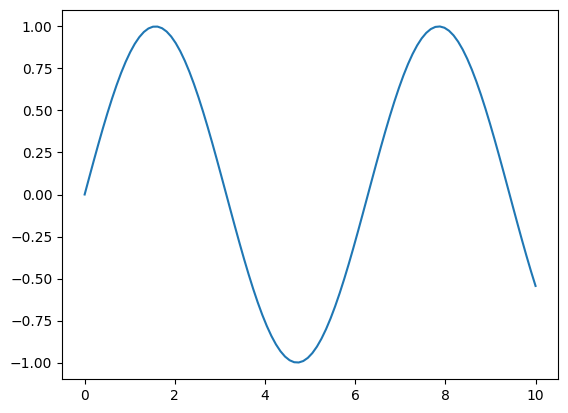

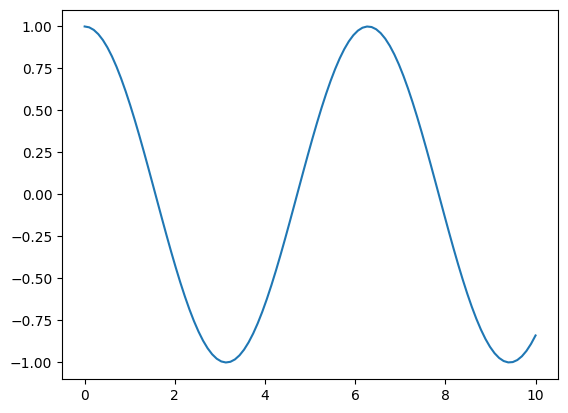

In [1]:
%run "D:\Света\Python\Advanced\2023\12\plot.py"

#### Plotting from an IPython notebook

The IPython notebook is a browser-based interactive data analysis tool that can combine narrative, code, graphics, HTML elements, and much more into a single executable document.

Plotting interactively within an IPython notebook can be done with the ``%matplotlib`` command, and works in a similar way to the IPython shell.
In the IPython notebook, you also have the option of embedding graphics directly in the notebook, with two possible options:

- ``%matplotlib notebook`` will lead to *interactive* plots embedded within the notebook
- ``%matplotlib inline`` will lead to *static* images of your plot embedded in the notebook



In [53]:
%matplotlib inline

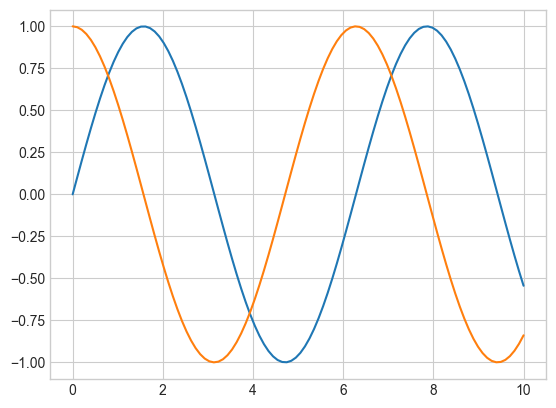

In [54]:
import numpy as np

x = np.linspace(0, 10, 100)

plt.plot(x, np.sin(x))

plt.plot(x, np.cos(x))

plt.show()

After running this command (it needs to be done only once per kernel/session), any cell within the notebook that creates a plot will embed a PNG image of the resulting graphic:

Text(0, 0.5, 'functions')

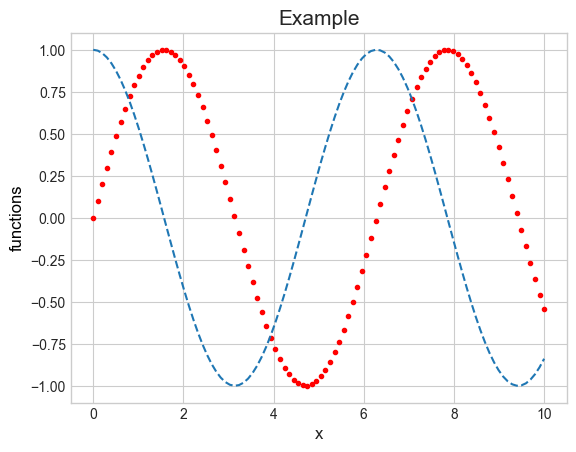

In [55]:
fig = plt.figure()
plt.plot(x, np.sin(x),'r.')
plt.plot(x, np.cos(x), '--');
plt.title('Example', fontsize=15)
plt.xlabel('x', fontsize=12)
plt.ylabel('functions', fontsize=12, color='black')

### Saving Figures to File

One nice feature of Matplotlib is the ability to save figures in a wide variety of formats.
Saving a figure can be done using the ``savefig()`` command.
For example, to save the previous figure as a PNG file, you can run this:

In [13]:
fig.savefig('my_figure.png', dpi=200)

We now have a file called ``my_figure.png`` in the current working directory:

In [14]:
import os
os.getcwd()

'C:\\Users\\User\\test\\lectures\\Lecture 14'

To confirm that it contains what we think it contains, let's use the IPython ``Image`` object to display the contents of this file:

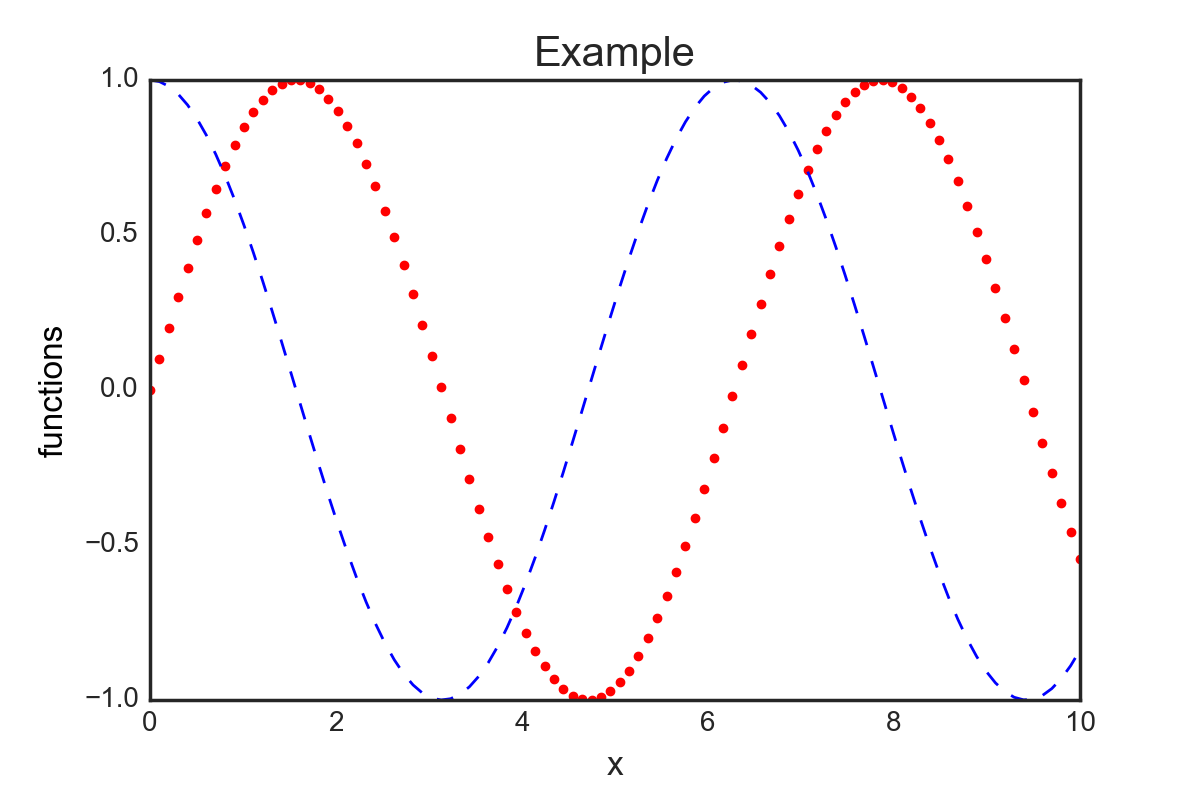

In [15]:
from IPython.display import Image
Image('my_figure.png')

In ``savefig()``, the file format is inferred from the extension of the given filename.
Depending on what backends you have installed, many different file formats are available.
The list of supported file types can be found for your system by using the following method of the figure canvas object:

In [16]:
fig.canvas.get_supported_filetypes()

{'ps': 'Postscript',
 'eps': 'Encapsulated Postscript',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'jpg': 'Joint Photographic Experts Group',
 'jpeg': 'Joint Photographic Experts Group',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format'}

Note that when saving your figure, it's not necessary to use ``plt.show()`` or related commands discussed earlier.